### Лабораторная работа 2
- Ассоциативные правила
- Цель работы: исследование методов анализа ассоциативных правил.
### загрузим датасет


ПУНКТ 1: ЗАГРУЗКА ДАТАСЕТА
Датасет загружен: 7501 транзакций, 20 столбцов
Пример данных:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10    

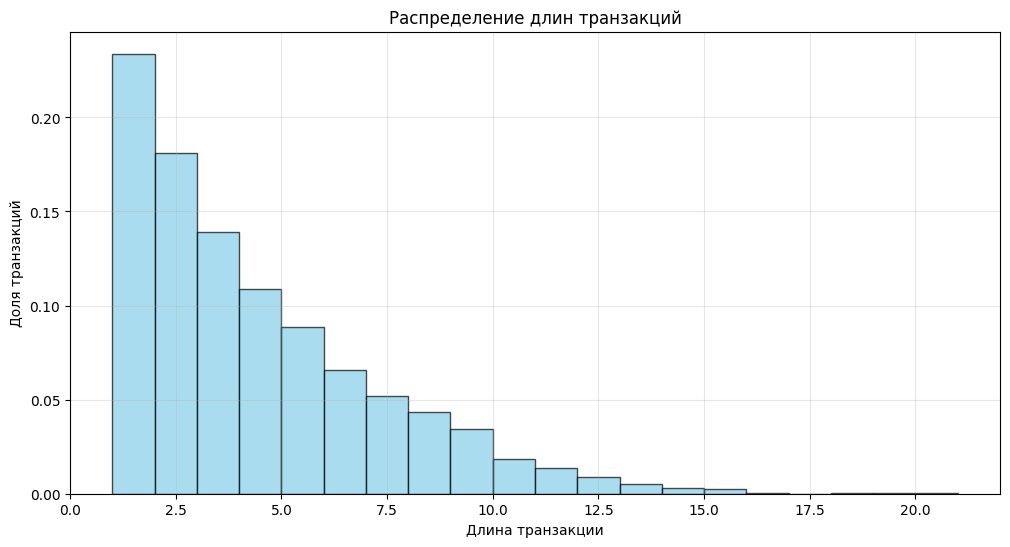


Уникальные товары: 120
Примеры 20 товаров:
  1. grated cheese
  2. butter
  3. mint
  4. whole wheat pasta
  5. energy bar
  6. parmesan cheese
  7. tomato juice
  8. light cream
  9. extra dark chocolate
  10. asparagus
  11. melons
  12. mint green tea
  13. chutney
  14. honey
  15. champagne
  16. french fries
  17. cider
  18. salad
  19. muffins
  20. tomato sauce

Подготовленные данные: (7501, 120)
Общее количество покупок: 29358

Топ-15 самых популярных товаров:
  mineral water: 1788 покупок (23.8%)
  eggs: 1348 покупок (18.0%)
  spaghetti: 1306 покупок (17.4%)
  french fries: 1282 покупок (17.1%)
  chocolate: 1229 покупок (16.4%)
  green tea: 991 покупок (13.2%)
  milk: 972 покупок (13.0%)
  ground beef: 737 покупок (9.8%)
  frozen vegetables: 715 покупок (9.5%)
  pancakes: 713 покупок (9.5%)
  burgers: 654 покупок (8.7%)
  cake: 608 покупок (8.1%)
  cookies: 603 покупок (8.0%)
  escalope: 595 покупок (7.9%)
  low fat yogurt: 574 покупок (7.7%)


C:\Users\batal\AppData\Local\Temp\ipykernel_7852\3120887752.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


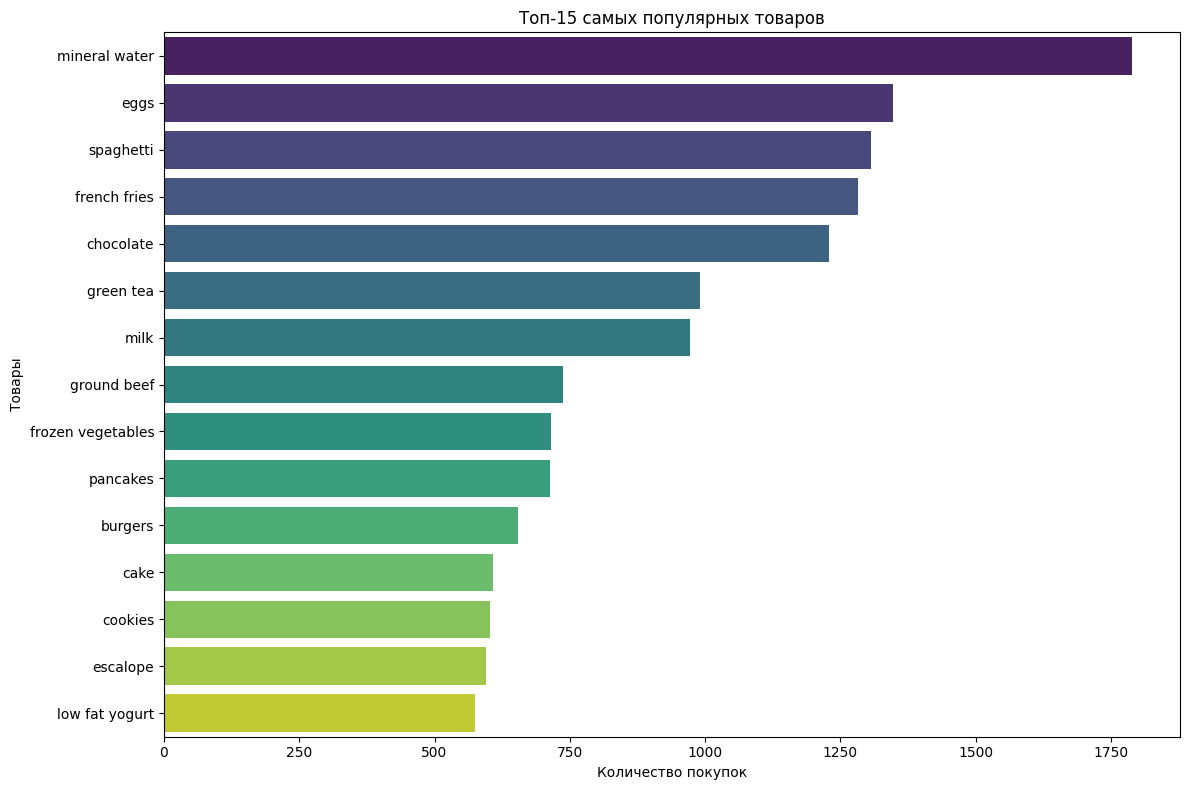


ПУНКТ 3: АНАЛИЗ АЛГОРИТМОМ APRIORI
Параметры: поддержка=0.02, достоверность=0.25
Результаты Apriori:
  - Частых наборов: 103
  - Ассоциативных правил: 28

Топ-10 правил по достоверности:
  soup -> mineral water
    Поддержка: 0.023, Достоверность: 0.456, Лифт: 1.915
  olive oil -> mineral water
    Поддержка: 0.028, Достоверность: 0.419, Лифт: 1.758
  ground beef -> mineral water
    Поддержка: 0.041, Достоверность: 0.417, Лифт: 1.748
  ground beef -> spaghetti
    Поддержка: 0.039, Достоверность: 0.399, Лифт: 2.291
  cooking oil -> mineral water
    Поддержка: 0.020, Достоверность: 0.394, Лифт: 1.654
  chicken -> mineral water
    Поддержка: 0.023, Достоверность: 0.380, Лифт: 1.594
  frozen vegetables -> mineral water
    Поддержка: 0.036, Достоверность: 0.375, Лифт: 1.572
  milk -> mineral water
    Поддержка: 0.048, Достоверность: 0.370, Лифт: 1.554
  tomatoes -> mineral water
    Поддержка: 0.024, Достоверность: 0.357, Лифт: 1.497
  pancakes -> mineral water
    Поддержка: 0.034, 

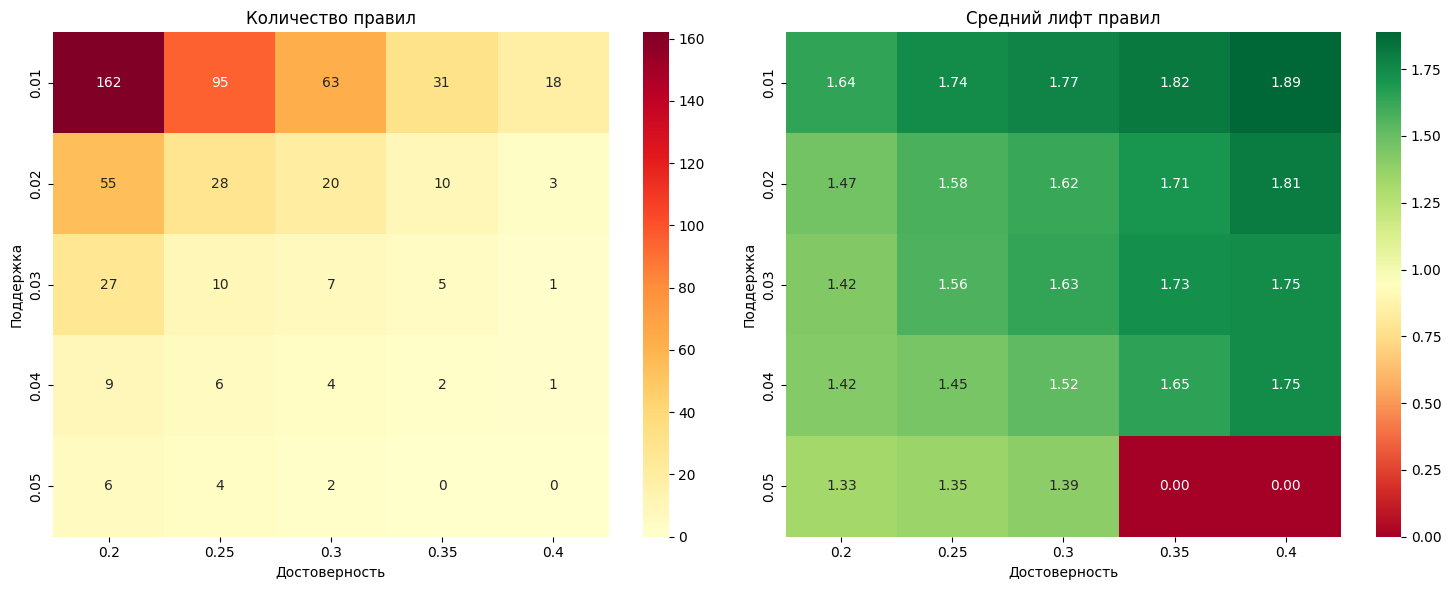


ПУНКТ 7: АНАЛИЗ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ


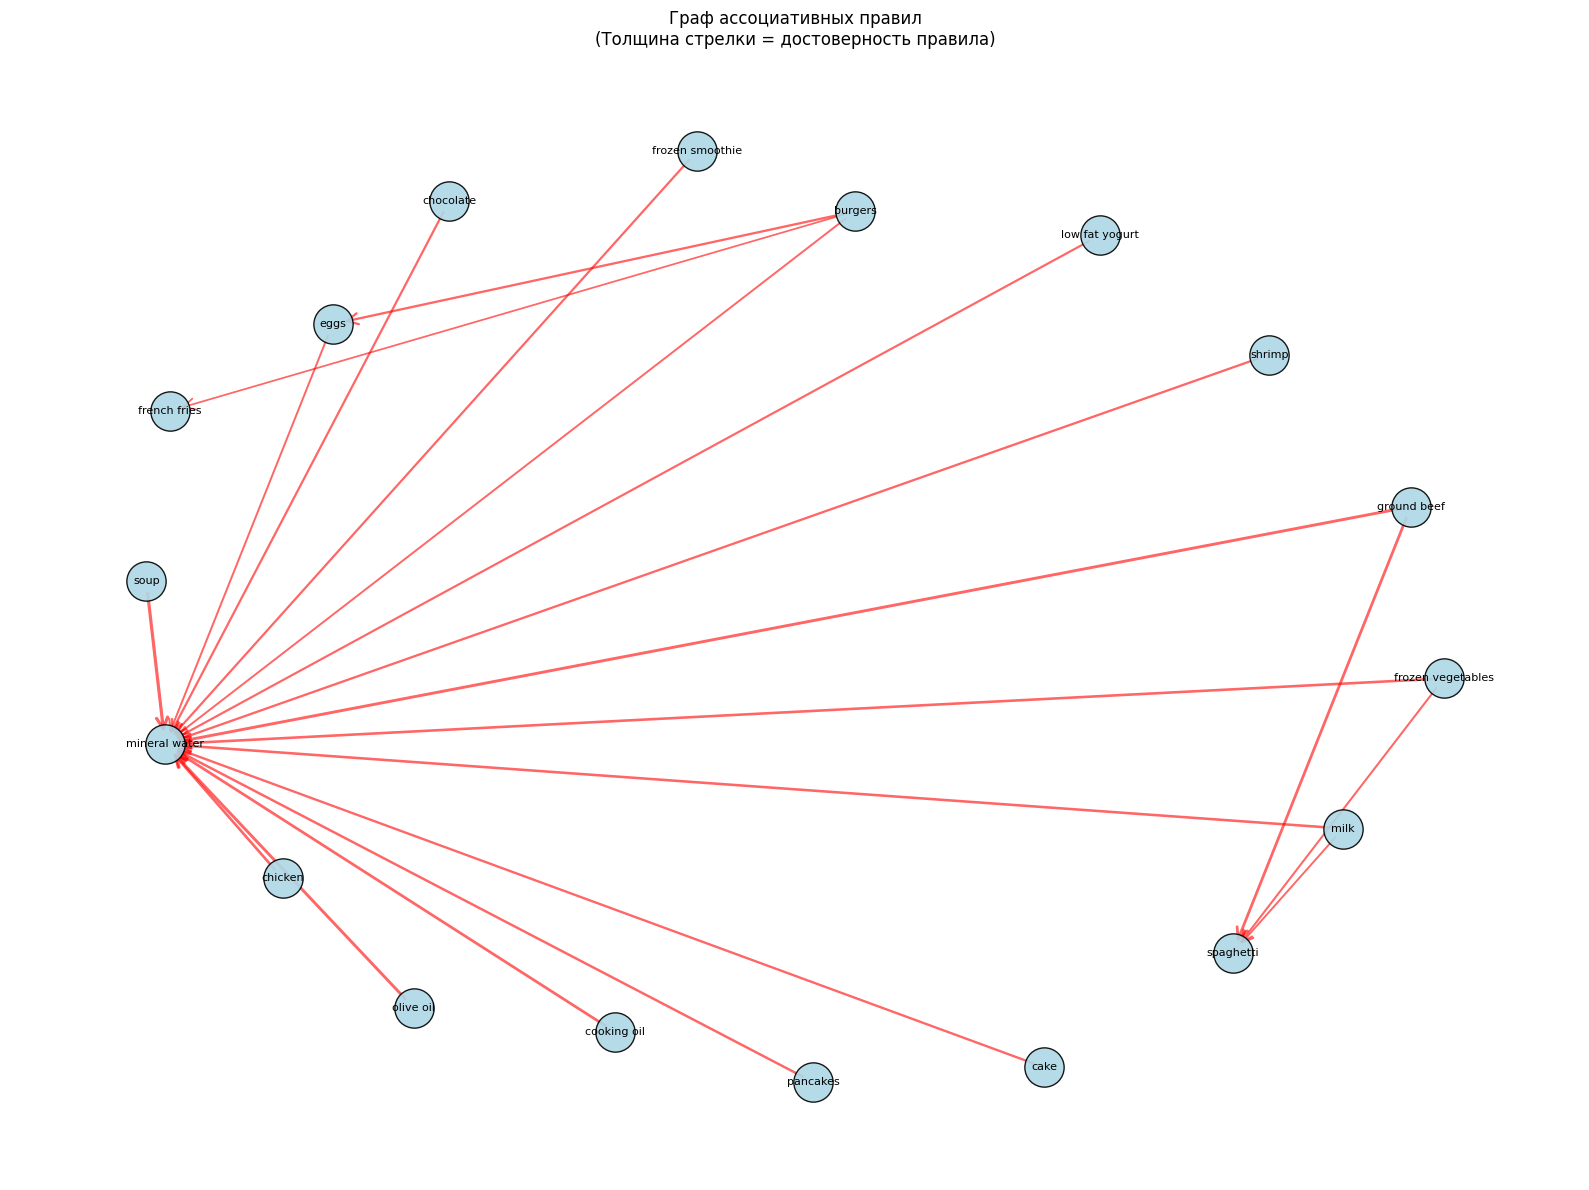

АНАЛИЗ ГРАФА:
  - Узлов: 18
  - Ребер: 20
  - Самые центральные узлы:
    mineral water: 0.882
    burgers: 0.176
    spaghetti: 0.176
    eggs: 0.118
    frozen vegetables: 0.118
  - Товары-лидеры (чаще влияют на покупки):
    burgers: 3 исходящих связей
    frozen vegetables: 2 исходящих связей
    ground beef: 2 исходящих связей
  - Популярные цели (чаще покупаются с другими):
    mineral water: 15 входящих связей
    spaghetti: 3 входящих связей
    eggs: 1 входящих связей

ИНФОРМАЦИЯ ИЗ ГРАФА:
1. Центральные товары часто встречаются в правилах
2. Толстые стрелки = высокодостоверные правила
3. Кластеры узлов = группы часто покупаемых вместе товаров
4. Изолированные узлы = товары с уникальными паттернами покупок

ПУНКТ 8: СОБСТВЕННЫЙ СПОСОБ ВИЗУАЛИЗАЦИИ
Создание комплексной визуализации...


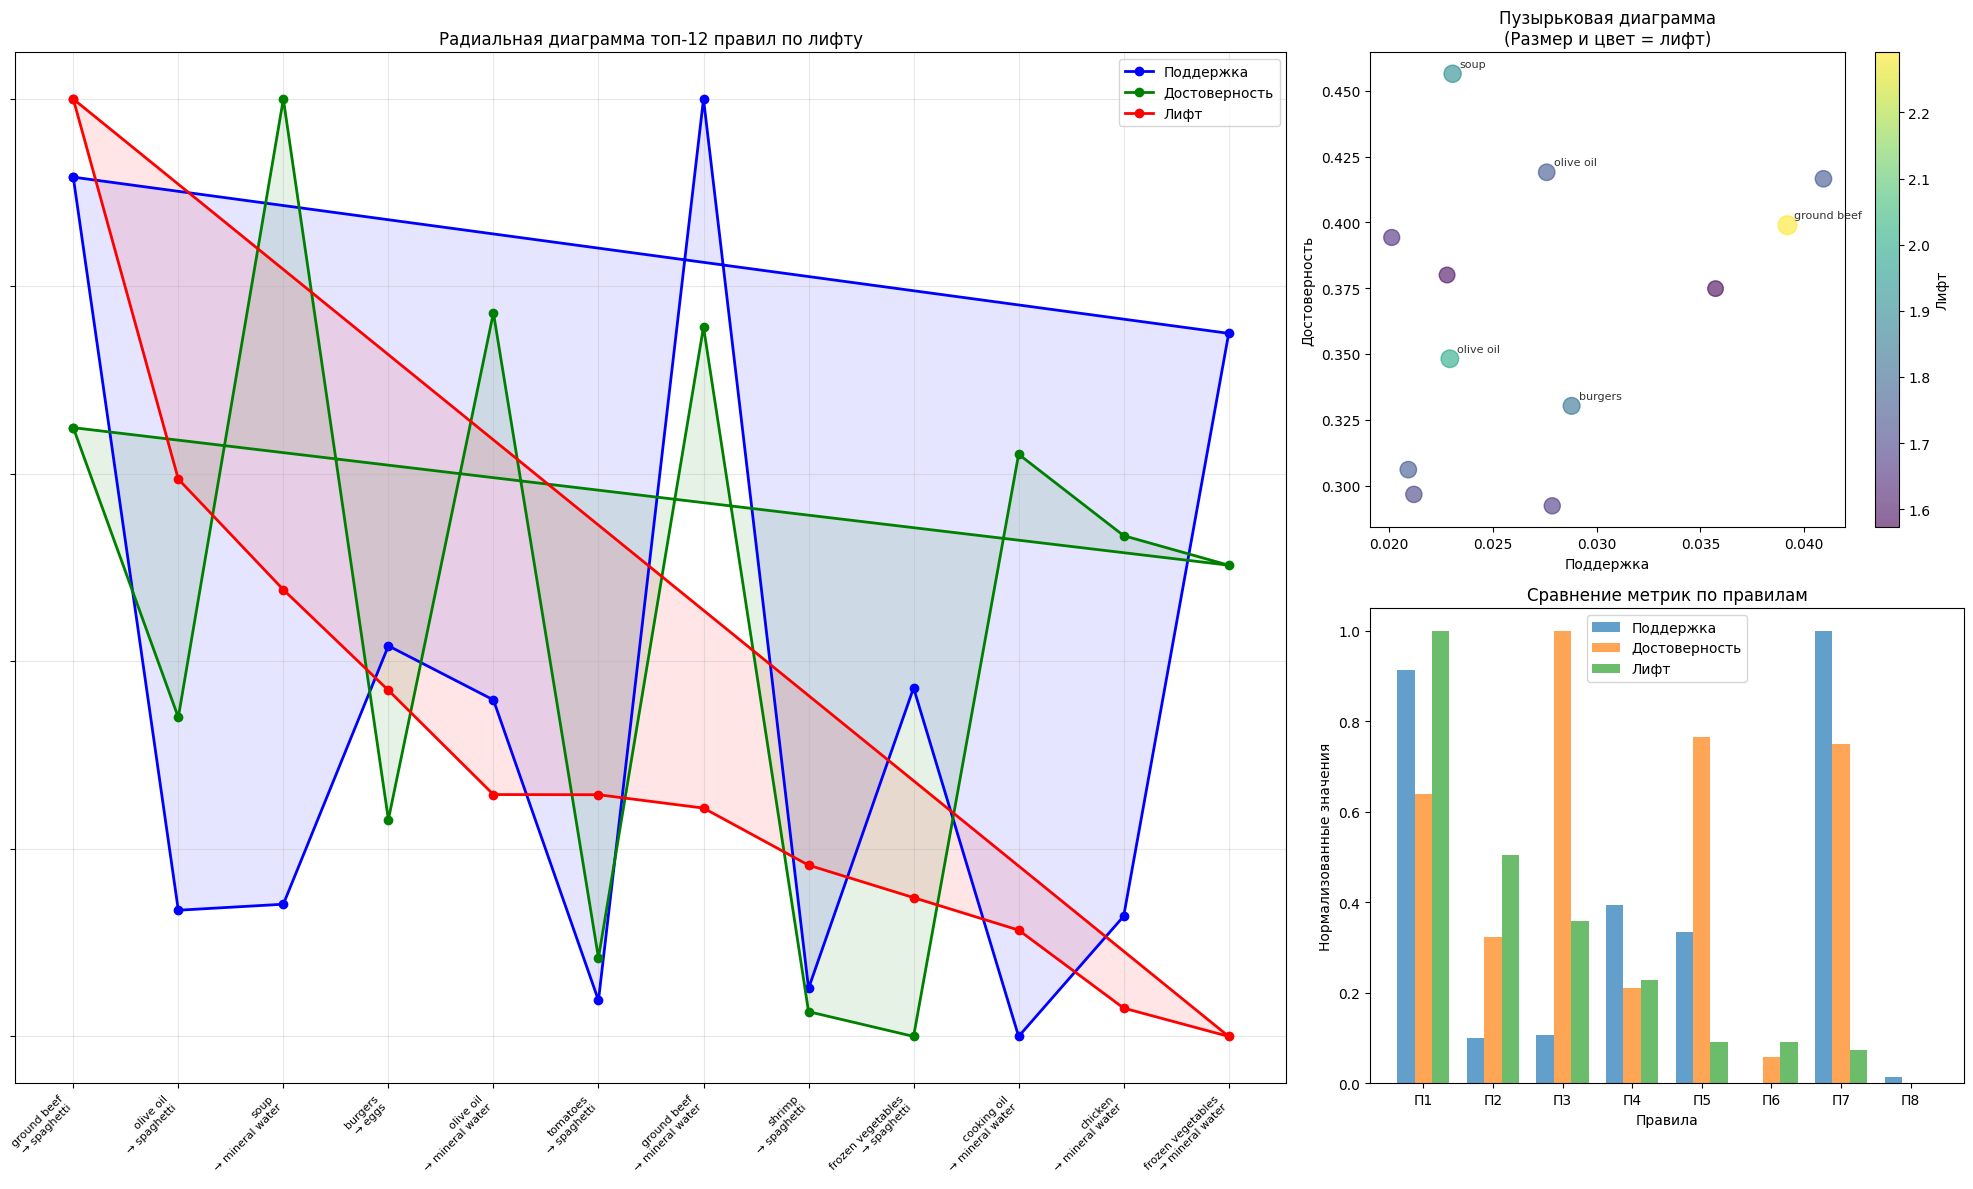

ОПИСАНИЕ ВИЗУАЛИЗАЦИИ:
1. Радиальная диаграмма - показывает все метрики для каждого правила
2. Пузырьковая диаграмма - анализирует компромиссы между метриками
3. Столбчатая диаграмма - сравнивает нормализованные значения метрик
4. Цветовая кодировка - помогает быстро оценить качество правил

ВСЕ 8 ПУНКТОВ ЛАБОРАТОРНОЙ РАБОТЫ ВЫПОЛНЕНЫ


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
from itertools import combinations

# ============================================================================
# ПУНКТ 1: Загрузка датасета
# ============================================================================

print("="*70)
print("ПУНКТ 1: ЗАГРУЗКА ДАТАСЕТА")
print("="*70)

all_data = pd.read_csv('Market_Basket_Optimisation (1).csv', header=None)
print(f"Датасет загружен: {all_data.shape[0]} транзакций, {all_data.shape[1]} столбцов")
print("Пример данных:")
print(all_data.head())

# ============================================================================
# ПУНКТ 2: Описание данных
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 2: ОПИСАНИЕ ДАННЫХ")
print("="*70)

# Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)

print("Статистика транзакций:")
print(f"Общее количество транзакций: {len(all_data)}")
print(f"Средняя длина транзакции: {transaction_lengths.mean():.2f} товара")
print(f"Максимальная длина: {transaction_lengths.max()} товаров")
print(f"Минимальная длина: {transaction_lengths.min()} товаров")
print(f"Медиана: {transaction_lengths.median()} товаров")

# График распределения длин транзакций
plt.figure(figsize=(12, 6))
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2), 
         alpha=0.7, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Длина транзакции')
plt.ylabel('Доля транзакций')
plt.title('Распределение длин транзакций')
plt.grid(True, alpha=0.3)
plt.show()

# Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row if isinstance(elem, str) and str(elem) != 'nan'] for row in np_data]

# Уникальные товары
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

print(f"\nУникальные товары: {len(unique_items)}")
print("Примеры 20 товаров:")
for i, item in enumerate(list(unique_items)[:20]):
    print(f"  {i+1}. {item}")

# Подготовка данных для анализа
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nПодготовленные данные: {data.shape}")
print(f"Общее количество покупок: {data.sum().sum()}")

# Топ товаров
top_items = data.sum().sort_values(ascending=False).head(15)
print("\nТоп-15 самых популярных товаров:")
for item, count in top_items.items():
    print(f"  {item}: {count} покупок ({count/len(data)*100:.1f}%)")

# Визуализация топ товаров
plt.figure(figsize=(12, 8))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Топ-15 самых популярных товаров')
plt.xlabel('Количество покупок')
plt.ylabel('Товары')
plt.tight_layout()
plt.show()

# ============================================================================
# ПУНКТ 3: Алгоритм Apriori
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 3: АНАЛИЗ АЛГОРИТМОМ APRIORI")
print("="*70)

min_support = 0.02
min_confidence = 0.25

print(f"Параметры: поддержка={min_support}, достоверность={min_confidence}")

# Анализ Apriori
frequent_apriori = apriori(data, min_support=min_support, use_colnames=True)
frequent_apriori['length'] = frequent_apriori['itemsets'].apply(lambda x: len(x))
rules_apriori = association_rules(frequent_apriori, metric="confidence", min_threshold=min_confidence)

print(f"Результаты Apriori:")
print(f"  - Частых наборов: {len(frequent_apriori)}")
print(f"  - Ассоциативных правил: {len(rules_apriori)}")

if len(rules_apriori) > 0:
    # Анализ правил
    rules_apriori['antecedent_len'] = rules_apriori['antecedents'].apply(lambda x: len(x))
    rules_apriori['consequent_len'] = rules_apriori['consequents'].apply(lambda x: len(x))
    
    print(f"\nТоп-10 правил по достоверности:")
    top_conf = rules_apriori.nlargest(10, 'confidence')
    for idx, row in top_conf.iterrows():
        ant = ', '.join(list(row['antecedents']))
        cons = ', '.join(list(row['consequents']))
        print(f"  {ant} -> {cons}")
        print(f"    Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")
    
    print(f"\nТоп-10 правил по лифту:")
    top_lift = rules_apriori.nlargest(10, 'lift')
    for idx, row in top_lift.iterrows():
        ant = ', '.join(list(row['antecedents']))
        cons = ', '.join(list(row['consequents']))
        print(f"  {ant} -> {cons}")
        print(f"    Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")
    
    # Анализ полезных и тривиальных правил
    print(f"\nАНАЛИЗ КАЧЕСТВА ПРАВИЛ:")
    
    # Полезные правила (высокая достоверность и лифт > 1.5)
    useful_rules = rules_apriori[(rules_apriori['confidence'] > 0.5) & (rules_apriori['lift'] > 1.5)]
    print(f"Полезные правила (conf > 0.5, lift > 1.5): {len(useful_rules)}")
    if len(useful_rules) > 0:
        for idx, row in useful_rules.head(3).iterrows():
            ant = ', '.join(list(row['antecedents']))
            cons = ', '.join(list(row['consequents']))
            print(f"  ✓ {ant} -> {cons} (conf: {row['confidence']:.3f}, lift: {row['lift']:.3f})")
    
    # Тривиальные правила (низкий лифт)
    trivial_rules = rules_apriori[rules_apriori['lift'] < 1.1]
    print(f"Тривиальные правила (lift < 1.1): {len(trivial_rules)}")
    if len(trivial_rules) > 0:
        for idx, row in trivial_rules.head(3).iterrows():
            ant = ', '.join(list(row['antecedents']))
            cons = ', '.join(list(row['consequents']))
            print(f"  ⚠ {ant} -> {cons} (lift: {row['lift']:.3f})")

# ============================================================================
# ПУНКТ 4: Алгоритм FPGrowth
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 4: АНАЛИЗ АЛГОРИТМОМ FPGrowth")
print("="*70)

print(f"Параметры: поддержка={min_support}, достоверность={min_confidence}")

# Анализ FPGrowth
frequent_fpgrowth = fpgrowth(data, min_support=min_support, use_colnames=True)
frequent_fpgrowth['length'] = frequent_fpgrowth['itemsets'].apply(lambda x: len(x))
rules_fpgrowth = association_rules(frequent_fpgrowth, metric="confidence", min_threshold=min_confidence)

print(f"Результаты FPGrowth:")
print(f"  - Частых наборов: {len(frequent_fpgrowth)}")
print(f"  - Ассоциативных правил: {len(rules_fpgrowth)}")

if len(rules_fpgrowth) > 0:
    print(f"\nТоп-10 правил FPGrowth по лифту:")
    top_fp = rules_fpgrowth.nlargest(10, 'lift')
    for idx, row in top_fp.iterrows():
        ant = ', '.join(list(row['antecedents']))
        cons = ', '.join(list(row['consequents']))
        print(f"  {ant} -> {cons}")
        print(f"    Поддержка: {row['support']:.3f}, Достоверность: {row['confidence']:.3f}, Лифт: {row['lift']:.3f}")

# Сравнение алгоритмов
print(f"\nСРАВНЕНИЕ АЛГОРИТМОВ:")
print(f"Apriori:  {len(frequent_apriori)} наборов, {len(rules_apriori)} правил")
print(f"FPGrowth: {len(frequent_fpgrowth)} наборов, {len(rules_fpgrowth)} правил")

# ============================================================================
# ПУНКТ 5: Определение минимальных значений поддержки
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 5: ОПРЕДЕЛЕНИЕ МИНИМАЛЬНЫХ ЗНАЧЕНИЙ ПОДДЕРЖКИ")
print("="*70)

def find_min_support(target_length, max_support=0.1, step=0.001):
    """Находит минимальную поддержку для наборов заданной длины"""
    support = step
    while support <= max_support:
        frequent_test = apriori(data, min_support=support, use_colnames=True)
        frequent_test['length'] = frequent_test['itemsets'].apply(lambda x: len(x))
        itemsets_of_length = frequent_test[frequent_test['length'] == target_length]
        
        if len(itemsets_of_length) > 0:
            return support, len(itemsets_of_length)
        support += step
    return None, 0

print("Поиск минимальной поддержки для наборов разной длины:")
for length in range(1, 6):
    min_sup, count = find_min_support(length)
    if min_sup:
        # Получаем примеры наборов
        frequent_test = apriori(data, min_support=min_sup, use_colnames=True)
        frequent_test['length'] = frequent_test['itemsets'].apply(lambda x: len(x))
        examples = frequent_test[frequent_test['length'] == length].head(2)['itemsets']
        
        example_str = []
        for ex in examples:
            example_str.append(', '.join(list(ex)))
        
        print(f"Длина {length}: мин.поддержка {min_sup:.3f}, наборов: {count}")
        print(f"  Примеры: {example_str}")
    else:
        print(f"Длина {length}: не найдено при поддержке до 0.1")

# ============================================================================
# ПУНКТ 6: Эксперименты с параметрами
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 6: ЭКСПЕРИМЕНТЫ С ПАРАМЕТРАМИ")
print("="*70)

support_values = [0.01, 0.02, 0.03, 0.04, 0.05]
confidence_values = [0.2, 0.25, 0.3, 0.35, 0.4]

results = []
print("Эксперименты с параметрами:")
print("Поддержка | Достоверность | Наборы | Правила | Сред.лифт | Макс.лифт")

for sup in support_values:
    for conf in confidence_values:
        try:
            frequent_exp = apriori(data, min_support=sup, use_colnames=True)
            rules_exp = association_rules(frequent_exp, metric="confidence", min_threshold=conf)
            
            avg_lift = rules_exp['lift'].mean() if len(rules_exp) > 0 else 0
            max_lift = rules_exp['lift'].max() if len(rules_exp) > 0 else 0
            
            results.append({
                'support': sup,
                'confidence': conf,
                'frequent_itemsets': len(frequent_exp),
                'rules': len(rules_exp),
                'avg_lift': avg_lift,
                'max_lift': max_lift
            })
            
            print(f"   {sup:.2f}    |      {conf:.2f}      |  {len(frequent_exp):4d}  |   {len(rules_exp):3d}   |    {avg_lift:.2f}    |    {max_lift:.2f}")
            
        except Exception as e:
            print(f"   {sup:.2f}    |      {conf:.2f}      |  ----  |   ---   |    --    |    --")

# Анализ результатов экспериментов
results_df = pd.DataFrame(results)

print(f"\nВЫВОДЫ ИЗ ЭКСПЕРИМЕНТОВ:")
print("1. Влияние поддержки:")
low_support = results_df[results_df['support'] == 0.01]
high_support = results_df[results_df['support'] == 0.05]
print(f"   - Поддержка 0.01: в среднем {low_support['rules'].mean():.0f} правил")
print(f"   - Поддержка 0.05: в среднем {high_support['rules'].mean():.0f} правил")

print("2. Влияние достоверности:")
low_conf = results_df[results_df['confidence'] == 0.2]
high_conf = results_df[results_df['confidence'] == 0.4]
print(f"   - Достоверность 0.2: в среднем {low_conf['rules'].mean():.0f} правил")
print(f"   - Достоверность 0.4: в среднем {high_conf['rules'].mean():.0f} правил")

print("3. Качество правил:")
best_quality = results_df.nlargest(3, 'avg_lift')
print("   Лучшее качество правил (средний лифт):")
for _, row in best_quality.iterrows():
    print(f"   - Поддержка {row['support']:.2f}, достоверность {row['confidence']:.2f}: лифт {row['avg_lift']:.2f}")

# Визуализация экспериментов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Тепловая карта количества правил
pivot_rules = results_df.pivot(index='support', columns='confidence', values='rules')
sns.heatmap(pivot_rules, annot=True, fmt='d', cmap='YlOrRd', ax=ax1)
ax1.set_title('Количество правил')
ax1.set_xlabel('Достоверность')
ax1.set_ylabel('Поддержка')

# Тепловая карта среднего лифта
pivot_lift = results_df.pivot(index='support', columns='confidence', values='avg_lift')
sns.heatmap(pivot_lift, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax2)
ax2.set_title('Средний лифт правил')
ax2.set_xlabel('Достоверность')
ax2.set_ylabel('Поддержка')

plt.tight_layout()
plt.show()

# ============================================================================
# ПУНКТ 7: Анализ графа ассоциативных правил
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 7: АНАЛИЗ ГРАФА АССОЦИАТИВНЫХ ПРАВИЛ")
print("="*70)

# Используем оптимальные правила для визуализации
optimal_rules = rules_apriori

if len(optimal_rules) > 0:
    G = nx.DiGraph()
    
    # Добавляем узлы и ребра
    for _, rule in optimal_rules.head(20).iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        
        # Добавляем товары как узлы
        for product in antecedents + consequents:
            G.add_node(product)
        
        # Создаем ребра
        if len(antecedents) > 1:
            antecedent_node = " + ".join(antecedents)
            G.add_node(antecedent_node)
            G.add_edge(antecedent_node, consequents[0], 
                      weight=rule['confidence'], 
                      support=rule['support'],
                      lift=rule['lift'])
        else:
            G.add_edge(antecedents[0], consequents[0], 
                      weight=rule['confidence'], 
                      support=rule['support'],
                      lift=rule['lift'])
    
    # Визуализация графа
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Рисуем узлы
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', 
                          alpha=0.9, edgecolors='black')
    
    # Рисуем ребра с толщиной по достоверности
    edges = G.edges()
    weights = [G[u][v]['weight'] * 5 for u, v in edges]
    
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, 
                          alpha=0.6, edge_color='red', arrows=True, 
                          arrowsize=20, arrowstyle='->')
    
    # Подписи
    nx.draw_networkx_labels(G, pos, font_size=8)
    
    plt.title('Граф ассоциативных правил\n(Толщина стрелки = достоверность правила)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Анализ графа
    print(f"АНАЛИЗ ГРАФА:")
    print(f"  - Узлов: {G.number_of_nodes()}")
    print(f"  - Ребер: {G.number_of_edges()}")
    
    # Центральность узлов
    degree_centrality = nx.degree_centrality(G)
    top_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"  - Самые центральные узлы:")
    for node, centrality in top_central:
        print(f"    {node}: {centrality:.3f}")
    
    # Анализ входящих/исходящих связей
    print(f"  - Товары-лидеры (чаще влияют на покупки):")
    out_degree = dict(G.out_degree())
    top_out = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:3]
    for node, degree in top_out:
        print(f"    {node}: {degree} исходящих связей")
    
    print(f"  - Популярные цели (чаще покупаются с другими):")
    in_degree = dict(G.in_degree())
    top_in = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:3]
    for node, degree in top_in:
        print(f"    {node}: {degree} входящих связей")
    
    print(f"\nИНФОРМАЦИЯ ИЗ ГРАФА:")
    print("1. Центральные товары часто встречаются в правилах")
    print("2. Толстые стрелки = высокодостоверные правила") 
    print("3. Кластеры узлов = группы часто покупаемых вместе товаров")
    print("4. Изолированные узлы = товары с уникальными паттернами покупок")

# ============================================================================
# ПУНКТ 8: Собственный способ визуализации
# ============================================================================

print("\n" + "="*70)
print("ПУНКТ 8: СОБСТВЕННЫЙ СПОСОБ ВИЗУАЛИЗАЦИИ")
print("="*70)

def create_custom_visualization(rules_df, top_n=15):
    """Создает комплексную визуализацию ассоциативных правил"""
    
    top_rules = rules_df.nlargest(top_n, 'lift')
    
    # Создаем фигуру с несколькими графиками
    fig = plt.figure(figsize=(20, 12))
    
    # 1. РАДИАЛЬНАЯ ДИАГРАММА
    ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2, rowspan=2)
    
    angles = np.linspace(0, 2 * np.pi, len(top_rules), endpoint=False).tolist()
    angles += angles[:1]
    
    # Нормализуем метрики
    support_norm = (top_rules['support'] - top_rules['support'].min()) / (top_rules['support'].max() - top_rules['support'].min())
    confidence_norm = (top_rules['confidence'] - top_rules['confidence'].min()) / (top_rules['confidence'].max() - top_rules['confidence'].min())
    lift_norm = (top_rules['lift'] - top_rules['lift'].min()) / (top_rules['lift'].max() - top_rules['lift'].min())
    
    support_radial = support_norm.tolist() + [support_norm.iloc[0]]
    confidence_radial = confidence_norm.tolist() + [confidence_norm.iloc[0]]
    lift_radial = lift_norm.tolist() + [lift_norm.iloc[0]]
    
    ax1.plot(angles, support_radial, 'o-', linewidth=2, label='Поддержка', color='blue')
    ax1.plot(angles, confidence_radial, 'o-', linewidth=2, label='Достоверность', color='green')
    ax1.plot(angles, lift_radial, 'o-', linewidth=2, label='Лифт', color='red')
    
    ax1.fill(angles, support_radial, alpha=0.1, color='blue')
    ax1.fill(angles, confidence_radial, alpha=0.1, color='green')
    ax1.fill(angles, lift_radial, alpha=0.1, color='red')
    
    # Подписи правил
    rule_labels = []
    for _, rule in top_rules.iterrows():
        antecedents = ', '.join(list(rule['antecedents']))
        consequents = ', '.join(list(rule['consequents']))
        label = f"{antecedents}\n→ {consequents}"
        rule_labels.append(label)
    
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(rule_labels, rotation=45, ha='right', fontsize=8)
    ax1.set_yticklabels([])
    ax1.set_title(f'Радиальная диаграмма топ-{top_n} правил по лифту')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    # 2. ПУЗЫРЬКОВАЯ ДИАГРАММА
    ax2 = plt.subplot2grid((2, 3), (0, 2))
    
    scatter = ax2.scatter(top_rules['support'], top_rules['confidence'], 
                         s=top_rules['lift']*80, 
                         c=top_rules['lift'], 
                         alpha=0.6, cmap='viridis')
    
    ax2.set_xlabel('Поддержка')
    ax2.set_ylabel('Достоверность')
    ax2.set_title('Пузырьковая диаграмма\n(Размер и цвет = лифт)')
    
    # Аннотации для сильных правил
    for i, (idx, rule) in enumerate(top_rules.head(5).iterrows()):
        ax2.annotate(f"{list(rule['antecedents'])[0]}", 
                    (rule['support'], rule['confidence']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)
    
    plt.colorbar(scatter, ax=ax2, label='Лифт')
    
    # 3. СРАВНЕНИЕ МЕТРИК
    ax3 = plt.subplot2grid((2, 3), (1, 2))
    
    metrics_data = top_rules[['support', 'confidence', 'lift']].head(8)
    metrics_normalized = (metrics_data - metrics_data.min()) / (metrics_data.max() - metrics_data.min())
    
    x_pos = np.arange(len(metrics_normalized))
    width = 0.25
    
    ax3.bar(x_pos - width, metrics_normalized['support'], width, label='Поддержка', alpha=0.7)
    ax3.bar(x_pos, metrics_normalized['confidence'], width, label='Достоверность', alpha=0.7)
    ax3.bar(x_pos + width, metrics_normalized['lift'], width, label='Лифт', alpha=0.7)
    
    ax3.set_xlabel('Правила')
    ax3.set_ylabel('Нормализованные значения')
    ax3.set_title('Сравнение метрик по правилам')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([f"П{i+1}" for i in range(len(metrics_normalized))])
    ax3.legend()
    
    plt.tight_layout()
    return fig

if len(optimal_rules) > 0:
    print("Создание комплексной визуализации...")
    custom_viz = create_custom_visualization(optimal_rules, top_n=12)
    plt.show()
    
    print("ОПИСАНИЕ ВИЗУАЛИЗАЦИИ:")
    print("1. Радиальная диаграмма - показывает все метрики для каждого правила")
    print("2. Пузырьковая диаграмма - анализирует компромиссы между метриками") 
    print("3. Столбчатая диаграмма - сравнивает нормализованные значения метрик")
    print("4. Цветовая кодировка - помогает быстро оценить качество правил")

print("\n" + "="*70)
print("ВСЕ 8 ПУНКТОВ ЛАБОРАТОРНОЙ РАБОТЫ ВЫПОЛНЕНЫ")
print("="*70)